In [ ]:
%%html
<style>
table {display: block;}
td {
  font-size: 20px
}
.rendered_html { font-size: 20px; }
*{ line-height: 200%; }
</style>
<style type="text/css" media="print"> body { -webkit-print-color-adjust: exact; } </style>

# Natural Language Processing and the Web WS 2024/25 - Practice Class - *Week 06*

In this tutorial, we will first go through on training NLP models using transformer models from HuggingFace 🤗. Then, we will briefly discuss on how to use LLMs using langchain.

Content
   * Basics of the Transformer based pre-trained LLMs and How to use them for text classification?

   * Finetuning a pre-trained LLM for text classification (e.g. RoBERTa)

The content of is based on the rsources mentioned at the end of the notebook.

*This notebook is optimized for GPU usage. While we have successfully run the code on Google Colab, we cannot guarantee seamless performance due to variations in GPU availability and usage. Please ensure your GPU is operational, and be mindful of potential GPU limits during execution.*


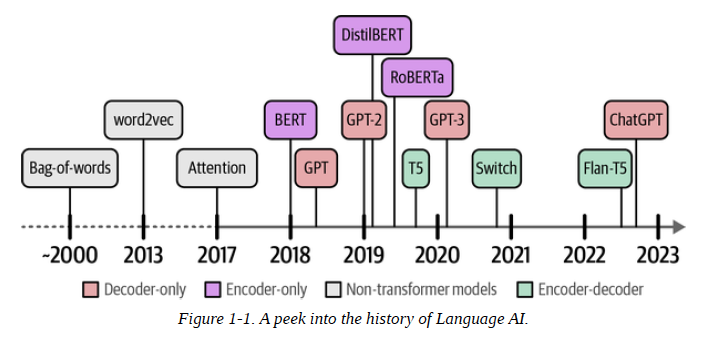

## Transformer architecture
The model is primarily composed of two blocks:

  **Encoder (left)**: The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.

  **Decoder (right)**: The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

  ![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_blocks.svg)

## Transformer models
All the Transformer models (GPT, BERT, RoBERTa, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

**Autoencoding models (Encoder-only)** are pretrained by corrupting the input tokens in some way and trying to reconstruct the original sentence. They correspond to the encoder of the original transformer model in the sense that they get access to the full inputs without any mask. Those models usually build a bidirectional representation of the whole sentence (Hence, called **representation models** as well). They can be fine-tuned and achieve great results on many tasks such as text generation, but their most natural application is sentence classification or token classification. A typical example of such models is **BERT**, which is trained on **masked language modeling** objective.

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/masked_modeling.svg)

**Autoregressive models (Decoder-only)** are pretrained on the classic language modeling task: guess the next token having read all the previous ones (**causal language modeling**). They correspond to the decoder of the original transformer model. Although those models can be fine-tuned and achieve great results on many tasks, the most natural application is text generation (Hence called **generative models** as well). A typical example of such models is **GPT**.

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/causal_modeling.svg)

**Sequence-to-sequence models (Encoder-Decoder)** use both the encoder and the decoder of the original transformer, either for translation tasks or by transforming other tasks to sequence-to-sequence problems. They can be fine-tuned to many tasks but their most natural applications are translation, summarization and question answering. The original transformer model is an example of such a model (only for translation), **T5** is an example of such models.

## Models based on size
![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/model_parameters.png)

## Creating LLMs is a two step process:

### Language modeling
The first step, called **pretraining**, where a model is trained from scratch: the weights are **randomly initialized**, and the training starts without any prior knowledge or a specific task other than language modelling. The resulting model is
often referred to as a **foundation model** or **base model**. These models
generally do not follow instructions.
![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/pretraining.svg)


### Finetuning
 Fine-tuning on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a **dataset specific to your task**.

 ![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/finetuning.svg)

## Explore existing models from transformers
### Pipeline
The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) is the easiest and fastest way to use a pretrained model for inference.
You can use the pipeline() out-of-the-box for many tasks across different modalities, some of which are shown in the table below:
For a complete list of available tasks, check out the pipeline API reference.

<Tip>

For a complete list of available tasks, check out the [pipeline API reference](https://huggingface.co/docs/transformers/main/en/./main_classes/pipelines).

</Tip>

| **Task**                     | **Description**                                                                                              | **Modality**    | **Pipeline identifier**                       |
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|-----------------------------------------------|
| Text classification          | assign a label to a given sequence of text                                                                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                                                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document                                                         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                                                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image                                                | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                                                                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                                                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question                                             | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question                                            | Multimodal      | pipeline(task="document-question-answering")  |
| Image captioning             | generate a caption for a given image                                                                         | Multimodal      | pipeline(task="image-to-text")                |

Start by creating an instance of [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) and specifying a task you want to use it for.

In [ ]:
# Transformers installation
! pip install transformers datasets

### Text Classification

Text classification pipeline using any **ModelForSequenceClassification**.
This text classification pipeline can currently be loaded from pipeline() using the following task identifier: "**sentiment-analysis**" (for classifying sequences according to positive or negative sentiments).

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier("We are very happy to show you the 🤗 Transformers library.")

In [ ]:
# Using a model identifier
classifier = pipeline(model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
classifier("We are very happy to show you the 🤗 Transformers library.")

### Token Classification
Pipeline using **ModelForTokenClassification** line of models
 can be loaded using task identifiers "**ner**" for named entity recognition and "**pos**" for and POS tagging

In [ ]:
classifier = pipeline(task="ner", aggregation_strategy="simple")
preds = classifier("Hugging Face is a French company based in New York City.")
preds

---

### Translation
Translates from one language to another.

This translation pipeline can currently be loaded from pipeline() using the following task identifier: "**translation_xx_to_yy**".

In [ ]:
translator = pipeline("translation_en_to_de")

translator("Today is very cold")

In [ ]:
translator = pipeline("translation_en_to_fr")

translator("Today is very cold")

---

### Text Generation
Based on two types of LM tasks, masked and causal, there are two use cases:
"**fill-mask**" and "**text-generation**"

#### Fill Mask


In [ ]:
filler = pipeline("fill-mask")

filler("We are very <mask> to show you the 🤗 Transformers library.")

In [ ]:
filler = pipeline(model="google-bert/bert-base-uncased")

filler("We are very [MASK] to show you the 🤗 Transformers library.")

----
----

# Using LLMs for Text Classification

- Using a fine-tuned task-specific model
- Using embeddings as features to train a task-specific classifier
- Finetuning a pre-trained model for task-specific data

## Sentiment Analysis
### Using a fine-tuned model



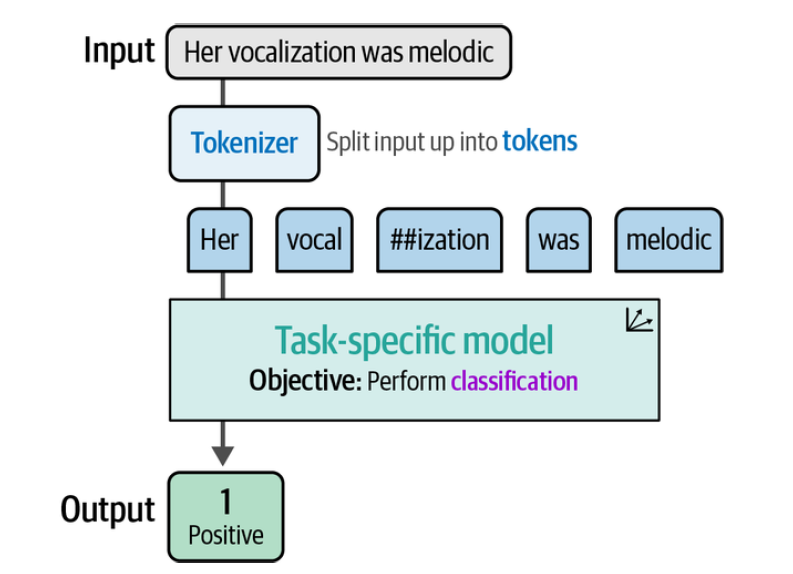

### Load Dataset
From dataset library from HF.

In [ ]:

from datasets import load_dataset_builder
dataset_id = "rotten_tomatoes"
# dataset_id =  "poem_sentiment"

# to inspect dataset

ds_builder = load_dataset_builder(dataset_id)
ds_builder.info


In [ ]:
# load dataset
from datasets import load_dataset
dataset = load_dataset(dataset_id)
dataset

In [ ]:
dataset["train"][0]

### Get a fine-tuned model

Look for a model trained on a sentiment task, and check for the compatible classes, as models and datasets can have varying level of class labels
check for related datasets here:
https://huggingface.co/datasets?search=sentiment

In [ ]:
from transformers import pipeline

model_id = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
# model_id = "siebert/sentiment-roberta-large-english"
# Load model into pipeline
pipe = pipeline( model=model_id)

In [ ]:
text = dataset["test"][0]["text"]
print("test example:", dataset["test"][0])
pipe(text)

#### Label Names Mapping
Since the model is returning a string as label, we need to map them in order to evaluate the predictions against ordinal/numerical classes of dataset

In [ ]:
class_names = ["NEGATIVE", "POSITIVE"]
label2id = {label: i for i, label in enumerate(class_names)}
id2label = {i: label for i, label in enumerate(class_names)}


In [ ]:
label2id

In [ ]:
id2label

### Run Model on Test set

In [ ]:
import numpy as np
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset

# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(dataset["test"], "text")), total=len(dataset["test"])):
  # print(output)
  # break
  y_pred.append(label2id[output['label']])

### Evaluate

In [ ]:
from sklearn.metrics import classification_report

result = classification_report(y_true=dataset["test"]["label"], y_pred=y_pred, target_names=class_names)
print(result)

## Using embeddings as features classifier

In last week, we have seen how to use Bag-of-words embeddings as feature vectors to train a simple Neural network as classifier model. This approach is similar to that method.

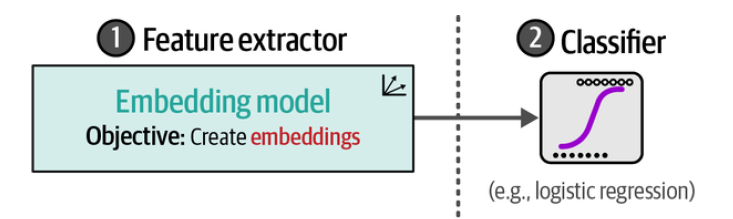

For sentence embeddings, we will use sentence-transformers libraray. **SentenceTransformers** is a Python framework for state-of-the-art sentence, text and image embeddings. You can find the list of available models here: https://huggingface.co/models?library=sentence-transformers

In [ ]:
! pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

# Load model, you can view the list of all sentence-transformers here:

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', model_kwargs={"torch_dtype": "float16"})

# Convert text to embeddings
train_embeddings = model.encode(dataset["train"]["text"], show_progress_bar=True)
test_embeddings = model.encode(dataset["test"]["text"], show_progress_bar=True)

In [ ]:
train_embeddings[0]

### Train a Classifier on Train set

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression on train dataset
clf = LogisticRegression(random_state=42)
clf.fit(train_embeddings, dataset["train"]["label"])


### Classify Test set and Evaluate

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(test_embeddings)

result = classification_report(y_true=dataset["test"]["label"], y_pred=y_pred, target_names=class_names)
print(result)


## Finetuning a pre-trained model

Unlike the previous approach, this third approach also updates the weights of the pre-trained model as well.

From transformers library, you can use any model that support SequenceClassification class, like RobertaForSequenceClassification, **BertForSequenceClassification** etc.
We will use Auto classes for both the tokenizer and models.

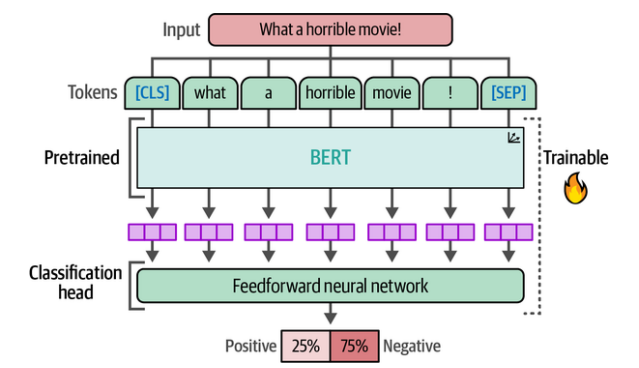

In [ ]:
!pip install transformers datasets huggingface_hub
!pip install accelerate -U
!pip install evaluate

### Dataset

In [ ]:
# load dataset
from datasets import load_dataset

dataset_id = "rotten_tomatoes"
dataset = load_dataset(dataset_id)
# Training, validation and testing datasets
train_dataset = dataset["train"]
test_dataset = dataset["test"]
val_dataset = dataset["validation"]

In [ ]:
class_names = ["NEGATIVE", "POSITIVE"]
label2id = {label: i for i, label in enumerate(class_names)}
id2label = {i: label for i, label in enumerate(class_names)}

### Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig

# Load model and tokenizer
model_id = "distilbert-base-uncased"
# model_id = "roberta-base"

tokenizer = AutoTokenizer.from_pretrained(model_id)
# Update the model's configuration with the id2label mapping, useful later on when using the model with pipeline
config = AutoConfig.from_pretrained(model_id)
config.update({"id2label": id2label})
model = AutoModelForSequenceClassification.from_pretrained(model_id, config=config)


# Method 2
# model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=2)



config

### Tokenize data

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], truncation=True)


train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

In [ ]:
train_dataset[0]

### Define Trainer and Args

Each data batch needs to be of same size, for that you can either use a max length to pad each sequence to of same length, or use a DataCollator class that will help to build batches of same size by padding each batch individually.

In [ ]:
from transformers import DataCollatorWithPadding
# Pad to the longest sequence in the batch
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    result =  classification_report(y_true=labels, y_pred=predictions, target_names=class_names, output_dict=True)
    return {"accuracy": result["accuracy"],
            "f1": result["weighted avg"]["f1-score"]
            }

In [ ]:
from transformers import TrainingArguments, Trainer
# from google.colab import userdata
# userdata.get('HF_ReadKey')

# to push model to hugging face
# repository_id = "YOUR_HUGGINGFACE_USERNAME/MODEL_ID"

# to save to local disk
repository_id = "movie_sentiment"

# Training arguments
training_args = TrainingArguments(
  output_dir=repository_id,
  learning_rate=2e-5,
  per_device_train_batch_size=16,
  per_device_eval_batch_size=16,
  num_train_epochs=1,
  weight_decay=0.01,
  eval_strategy="epoch",
  save_strategy="epoch",
  save_total_limit=1,
  load_best_model_at_end=True,
  report_to="none" # you can use tensorboard or wandb here.
  # push_to_hub=True,
  # hub_strategy="every_save",
  # hub_model_id=repository_id,
  # hub_token=HfFolder.get_token(),
)
# Trainer to execute the training and evaluation
trainer = Trainer(
 model=model,
 args=training_args,
 train_dataset=train_dataset,
 eval_dataset=val_dataset,
 data_collator=data_collator,
 compute_metrics=compute_metrics
)

### Train and Evaluate

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

### Test

In [ ]:
predictions = trainer.predict(test_dataset)
print(predictions.predictions.shape)

In [ ]:
import numpy as np

y_pred = np.argmax(predictions.predictions, axis=-1)
result = classification_report(y_true=predictions.label_ids, y_pred=y_pred, target_names=class_names)
print(result)

### Use as Pipeline

In [ ]:
trainer.save_model(output_dir=repository_id)

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=repository_id, tokenizer=tokenizer)
text = "a woman has been strangled with less weight:"
classifier(text)


# Exercise


## Task 4.1:
Finetune a RoBERTa base model for sentiment analysis task on the following dataset: https://huggingface.co/datasets/google-research-datasets/poem_sentiment

The **Poem Sentiment** is a sentiment dataset of poem verses from Project Gutenberg. The language of the dataset is English and the key details are as follows:

The data fileds are as follows
   * id: index of the example
   * verse_text: The text of the poem verse
   * label: The sentiment label. Here
     - 0 = negative
     - 1 = positive
     - 2 = no impact
     - 3 = mixed (both negative and positive)

Report the model performance on test set.
## Task 4.2:
Original test set contains only three classes, excluding the mixed class. To address this, merge all datasets, shuffle them, and perform a new balanced split of classes. Train a new model and provide a performance report.

# Resources
From Hugging Face:
* [Pipelines](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#pipelines)

* [Transformers](https://huggingface.co/learn/nlp-course/chapter1/4?fw=pt)

Book chapters from *Hands-On-Large-Language-Models*:
* [Text Classification with Transformers-1](https://github.com/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter04/Chapter%204%20-%20Text%20Classification.ipynb)
* [Text Classification with Transformers-2](https://github.com/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter11/Chapter%2011%20-%20Fine-Tuning%20BERT.ipynb)